In [2]:
import os
import sys
from os import path
import numpy as np
import pandas as pd
from scipy import sparse, io
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
RAW_DATA_DIR='C:\\Users\\RISHABH\\Documents\\input'

# LOADING DATA

In [15]:
train = pd.read_csv(path.join(RAW_DATA_DIR, 'gender_age_train.csv'))
events = pd.read_csv(path.join(RAW_DATA_DIR, 'events.csv'), parse_dates=['timestamp']) 
phone = pd.read_csv(path.join(RAW_DATA_DIR,'phone_brand_device_model.csv'))
app_events = pd.read_csv(path.join(RAW_DATA_DIR, 'app_events.csv'))
app_labels = pd.read_csv(path.join(RAW_DATA_DIR, 'app_labels.csv')) 

![title](Documents/input/td.png)


So we can clearly see data needs to be merged with train and test to access it gender age to be merged with phone to get device model and phone brand ,train to be merged with events data  Events is the event of accessing the phone with an app,event is connected to app events which contains details of the app which is opened ,app_event is connected to app_labels
which contains all categories the app belongs to app_label is connected to label_categories which contains name of the label.

In [6]:
train.group.unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [6]:

data = pd.read_csv(path.join(RAW_DATA_DIR, 'gender_age_train.csv'))
data = data.sort_values(by='age')
labels = data['group']

# Countplot gender

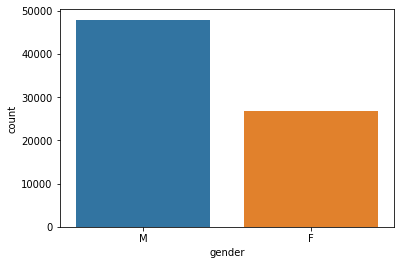

In [7]:
ax = sns.countplot(x='gender', data=data)

Observation there are more males than females in this dateset so it is unbalanced.

# distplot for age

Text(0.5, 1.0, 'Age distribution')

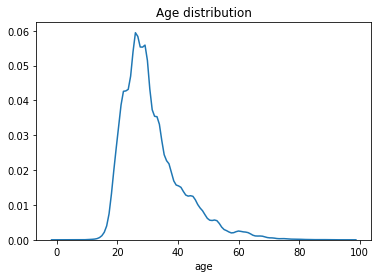

In [59]:
plt.figure()
age = sns.distplot(data['age'], hist=False)
age.set_title('Age distribution')

Observation-Age distribution is also unbalanced and most people are in their 20's

# distplot for age based on gender

Text(0.5, 1.0, 'Age distribution divided by gender')

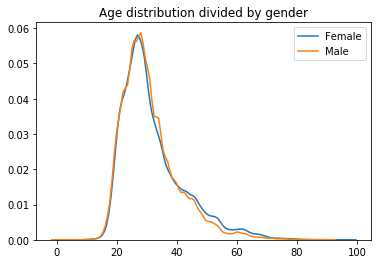

In [60]:
plt.figure()
sns.kdeplot( data['age'][ data['gender'] == 'F' ], label='Female')
sns.kdeplot( data['age'][ data['gender'] == 'M' ], label='Male').set_title(
                                        'Age distribution divided by gender')


Observation:Age distribution for male and females is almost same.

In [ ]:
Bar graph of groups for male and female

Text(0.5, 1.0, 'Male users in each group')

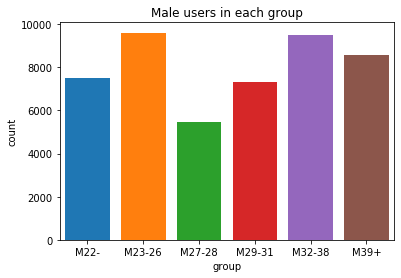

In [61]:
plt.figure()
ax = sns.countplot(x='group', data=data[data.gender == 'M'], saturation=1)
ax.set_title('Male users in each group')

Distribution of male in each group is also unbalanced 

Text(0.5, 1.0, 'Female users in each group')

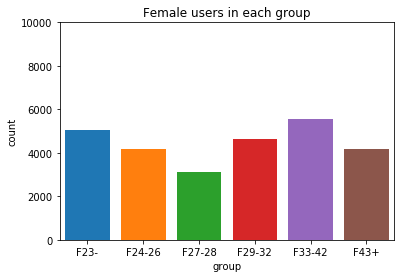

In [62]:
plt.figure()
ax = sns.countplot(x='group', data=data[data.gender == 'F'], saturation=1)
ax.axes.set_ylim(0,10000)
ax.set_title('Female users in each group')

Distribution of female in each group is also unbalanced 

These plots shows that the classes are unbalanced. Young people are largely more numerous than old, also there is a higher representation of males over females. Among the older, there are more data coming from males rather than females. This result is consistent with Chinese demographic and the fact that the use of technology is more diffused among younger generations. Therefore these data don't have to be resempled in order to create a uniform distribution of the classes.

In [8]:
labelled_app_events = (train.merge(events, how='left', on='device_id')
                            
                            )
labelled_app_events = labelled_app_events.fillna(-1) 
labelled_app_events=labelled_app_events.query('event_id!=-1')

In [9]:
labelled_app_events=labelled_app_events.merge(app_events, how='left', on='event_id')

In [10]:
labelled_app_events['timestamp']=pd.to_datetime(labelled_app_events.timestamp)

# COUNTPLOT FOR DAY

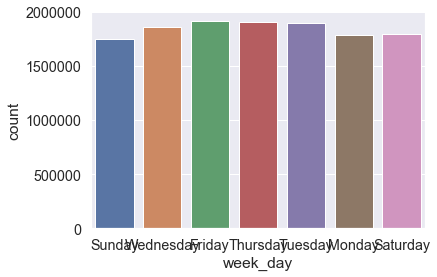

In [11]:
import calendar
sns.set(font_scale=1.3)

labelled_app_events['week_day'] = labelled_app_events.timestamp.dt.day_name()
plt.figure()
ax = sns.countplot(x="week_day", data=labelled_app_events)

Observation- Number of count for events is almost same for all days

# COUNTPLOT FOR DAY BASED ON GENDER

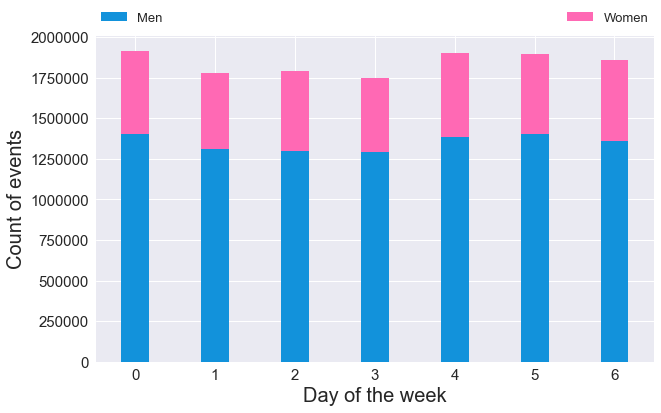

In [14]:
days = np.sort(labelled_app_events['week_day'].unique())
ind = np.arange(len(days))  # the x locations for the groups
width = 0.35

male_days = []
female_days = []
for day in days:
    day_rows = labelled_app_events[ labelled_app_events['week_day'] == day]
    female_days.append(len(day_rows.query('gender == "F"')))
    male_days.append(len(day_rows.query('gender == "M"')))

plt.figure(figsize=(10,6))

p1 = plt.bar(ind, male_days, width, color="#1292db", label='Men')
p2 = plt.bar(ind, female_days, width, color="#ff69b4", bottom=male_days, label='Women')

plt.ylabel('Count of events',{'fontsize': 20})
plt.xlabel('Day of the week',{'fontsize': 20})
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
ltext = plt.gca().get_legend().get_texts()
plt.setp(ltext[0], fontsize=20)
plt.setp(ltext[1], fontsize=20)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

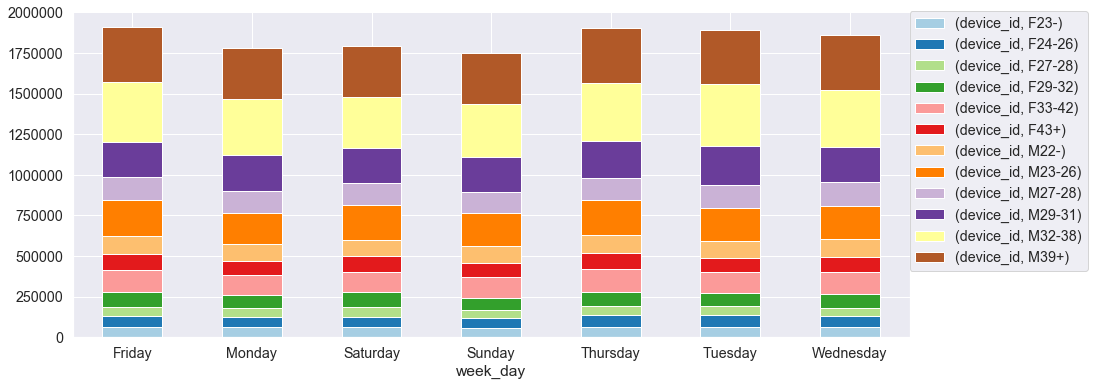

In [12]:
age_h = (labelled_app_events
           .groupby(['week_day', 'group'])
           .agg('count')
           ) 

age_h = age_h['device_id'].reset_index()
groups = age_h.pivot(index='week_day', columns='group') 

ax = groups.plot(kind='bar', stacked=True, colormap='Paired', rot=0, figsize=(15,6))
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
handles, labels = ax.get_legend_handles_labels()

Observation-day of week doesn't affect gender much almost same for all days.

# COUNTPLOT FOR HOUR 

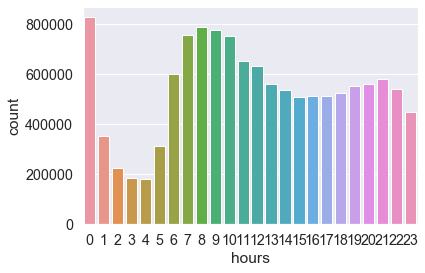

In [34]:

plt.figure()
labelled_app_events['hours'] = labelled_app_events['timestamp'].apply(lambda x: x.hour)
ax = sns.countplot(x='hours', data=labelled_app_events)

The count of events for hour of day varies considerably as expected

# COUNTPLOT FOR HOUR BASED ON GENDER

No handles with labels found to put in legend.


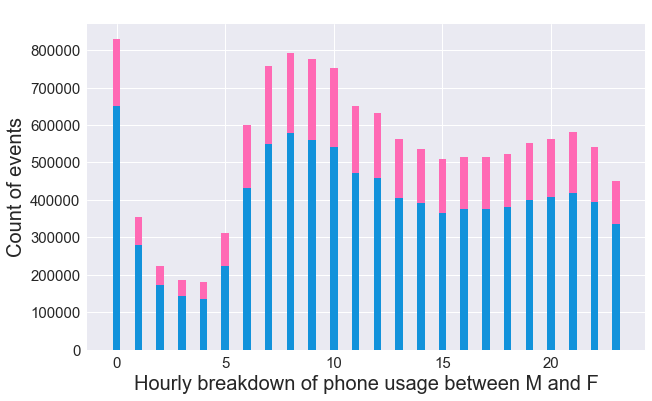

In [16]:
hours = np.sort(labelled_app_events['hours'].unique())
ind = np.arange(len(hours))  # the x locations for the groups
width = 0.35

male_hours = []
female_hours = []
for hour in hours:
    hour_rows = labelled_app_events[ labelled_app_events['hours'] == hour]
    female_hours.append(len(hour_rows.query('gender == "F"')))
    male_hours.append(len(hour_rows.query('gender == "M"')))

plt.figure(figsize=(10,6))
p1 = plt.bar(ind, male_hours, width, color="#1292db")
p2 = plt.bar(ind, female_hours, width, color="#ff69b4", bottom=male_hours)

plt.ylabel('Count of events',{'fontsize': 20})
plt.xlabel('Hourly breakdown of phone usage between M and F',{'fontsize': 20})
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
ltext = plt.gca().get_legend().get_texts()
plt.setp(ltext[0], fontsize=20)
plt.setp(ltext[1], fontsize=20)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

This seems like an important feature as there is considerable difference in use for males and females for different hours.

# COUNTPLOT FOR GROUP BASED ON GENDER

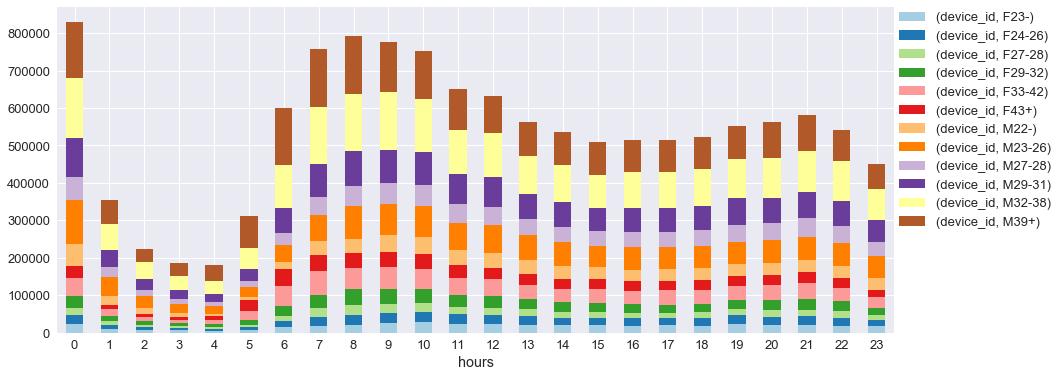

In [17]:
age_h = (labelled_app_events
           .groupby(['hours', 'group'])
           .agg('count')
           ) 

age_h = age_h['device_id'].reset_index()
groups = age_h.pivot(index='hours', columns='group') 

ax = groups.plot(kind='bar', stacked=True, colormap='Paired', rot=0, figsize=(15,6))
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
handles, labels = ax.get_legend_handles_labels()

same pattern is followed for group as well as there is considerable change for different groups

# Average events occuring each day

In [19]:
total_events=labelled_app_events.groupby('device_id')['event_id'].agg('count')

In [13]:
labelled_app_events.head()

,device_id,gender,age,group,event_id,timestamp,longitude,latitude,app_id,is_installed,is_active
0,-8260683887967679142,M,35,M32-38,2479656.0,2016-05-01 14:23:37,0.0,0.0,4.287147e+18,1.0,0.0
1,-8260683887967679142,M,35,M32-38,2479656.0,2016-05-01 14:23:37,0.0,0.0,-4.085687e+18,1.0,0.0
2,-8260683887967679142,M,35,M32-38,2479656.0,2016-05-01 14:23:37,0.0,0.0,6.324195e+18,1.0,0.0
3,-8260683887967679142,M,35,M32-38,2479656.0,2016-05-01 14:23:37,0.0,0.0,-8.687507e+18,1.0,0.0
4,-8260683887967679142,M,35,M32-38,2479656.0,2016-05-01 14:23:37,0.0,0.0,8.772885e+17,1.0,1.0


In [15]:
weekdays=np.sort(labelled_app_events['week_day'].unique())

In [16]:
def f(data): 
    count=0
    days=data.week_day.values  
    arr=np.zeros(7)
    for day in days:
        if day==weekdays[0]: 
            arr[0]+=1 
        elif day==weekdays[1]:
            arr[1]+=1 
        elif day==weekdays[2]:
            arr[2]+=1  
        elif day==weekdays[3]:
            arr[3]+=1 
        elif day==weekdays[4]:
            arr[4]+=1  
        elif day==weekdays[5]:
            arr[5]+=1 
        elif day==weekdays[6]:
            arr[6]+=1  
    for i in arr: 
        if i>0:
            count+=1
    return count

In [17]:
eventsonday=labelled_app_events.groupby('device_id').apply(f)

In [20]:
average_events_perday=total_events/eventsonday

In [23]:
average_events_perday=average_events_perday.reset_index() 
average_events_perday.columns=['device_id',]


,device_id,0
0,-9222956879900151005,768.000000
1,-9221026417907250887,117.285714
2,-9220830859283101130,26.000000
3,-9220061629197656378,265.571429
4,-9218960997324667698,33.750000
...,...,...
23304,9216925254504446539,406.000000
23305,9217638755105369544,47.000000
23306,9219164468944552013,1636.285714
23307,9219842210460037807,53.333333


In [ ]:
average_events_perday.columns=['device_id',"aepd"]

In [26]:
train=train.merge(average_events_perday)

In [32]:
train[0]

0         53.000000
1         42.500000
2         51.333333
3         34.750000
4         81.250000
            ...    
23304     31.600000
23305    179.714286
23306     60.000000
23307     43.000000
23308     29.800000
Name: 0, Length: 23309, dtype: float64

Text(0.5, 1.0, 'Average events distribution divided by gender')

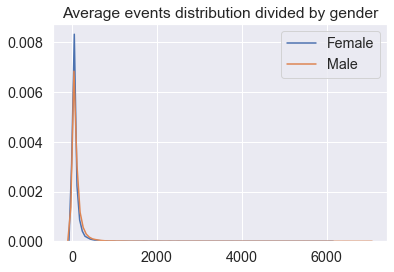

In [31]:
plt.figure()
sns.kdeplot( train[0][ train['gender'] == 'F' ], label='Female')
sns.kdeplot( train[0][ train['gender'] == 'M' ], label='Male').set_title(
                                        'Average events distribution divided by gender')

distribution seems similar for male and female

In [54]:
labelled_app_events['date']=labelled_app_events.timestamp.dt.date

# Average used time of day 


In [67]:
avg_used_time_perday=labelled_app_events.groupby('device_id')['hours'].agg(np.mean)

device_id
-9222956879900151005    14.223307
-9221026417907250887     9.755177
-9220830859283101130    15.384615
-9220061629197656378    12.385691
-9218960997324667698    15.725926
                          ...    
 9216925254504446539    15.325534
 9217638755105369544     4.000000
 9219164468944552013    12.632443
 9219842210460037807    10.225000
 9220914901466458680     8.299233
Name: hours, Length: 23309, dtype: float64

In [35]:
med_used_time_perday=labelled_app_events.groupby('device_id')['hours'].agg(np.median)

In [36]:
med_used_time_perday=med_used_time_perday.reset_index()

In [37]:
med_used_time_perday

,device_id,hours
0,-9222956879900151005,14.0
1,-9221026417907250887,7.0
2,-9220830859283101130,20.0
3,-9220061629197656378,11.0
4,-9218960997324667698,15.0
...,...,...
23304,9216925254504446539,15.0
23305,9217638755105369544,4.0
23306,9219164468944552013,12.0
23307,9219842210460037807,9.0


In [38]:
train=train.merge(med_used_time_perday)

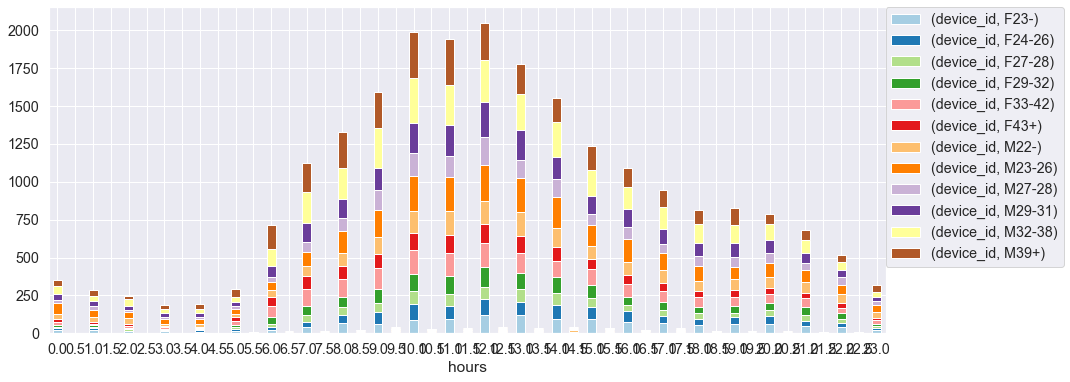

In [40]:
age_h = (  train
           .groupby(['hours', 'group'])
           .agg('count')
           ) 

age_h = age_h['device_id'].reset_index()
groups = age_h.pivot(index='hours', columns='group') 

ax = groups.plot(kind='bar', stacked=True, colormap='Paired', rot=0, figsize=(15,6))
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
handles, labels = ax.get_legend_handles_labels()

this also seems like a good feature as variation is there in target variable

# LABEL FEATURES

In [5]:
train = train.sort_values(by='age')
events = events.drop(['longitude', 'latitude', 'timestamp'], 1)
app_ids = np.concatenate((app_events['app_id'].unique(), app_labels['app_id'].unique() ),0)
app_enc = LabelEncoder()
app_enc.fit(app_ids)
app_events['app_id'] = app_enc.transform(app_events['app_id'])
app_labels['app_id'] = app_enc.transform(app_labels['app_id'])

In [6]:
labelled_app_events = (train.merge(events, how='left', on='device_id')
                            
                            )

labelled_app_events = labelled_app_events.fillna(-1) 
labelled_app_events=labelled_app_events.query('event_id!=-1')

In [6]:
labelled_app_events.head()

,device_id,gender,age,group,event_id
12,-636914245803081555,F,11,F23-,1401593.0
13,-636914245803081555,F,11,F23-,2093312.0
14,2075453102654381836,F,11,F23-,132968.0
15,2075453102654381836,F,11,F23-,181084.0
16,2075453102654381836,F,11,F23-,280562.0


In [7]:
labelled_app_events=labelled_app_events.merge(app_events, how='left', on='event_id')
                            

In [8]:
labelled_app_events.head()

,device_id,gender,age,group,event_id,app_id,is_installed,is_active
0,-636914245803081555,F,11,F23-,1401593.0,94347.0,1.0,0.0
1,-636914245803081555,F,11,F23-,1401593.0,25438.0,1.0,1.0
2,-636914245803081555,F,11,F23-,1401593.0,85210.0,1.0,0.0
3,-636914245803081555,F,11,F23-,1401593.0,19303.0,1.0,0.0
4,-636914245803081555,F,11,F23-,1401593.0,106104.0,1.0,0.0


In [16]:
train=train.merge(phone)

In [19]:
most_brand = train['phone_brand'].value_counts().head(10)
print(most_brand)
least_brand = train['phone_brand'].value_counts(ascending=True).head(10)
print(least_brand)

小米      17336
三星      13706
华为      13001
OPPO     5802
vivo     5658
魅族       4710
酷派       3349
联想       2695
金立       1124
HTC      1015
Name: phone_brand, dtype: int64
摩乐      1
优语      1
西门子     1
天宏时代    1
戴尔      1
ZOYE    1
欧乐酷     1
MIL     1
宝捷讯     1
普耐尔     1
Name: phone_brand, dtype: int64


In [20]:
female_most_brand = []
male_most_brand = []
for brand in most_brand.index:
    app_rows = train[ train['phone_brand'] == brand]
    female_most_brand.append(len(app_rows.query('gender == "F"')))
    male_most_brand.append(len(app_rows.query('gender == "M"')))

f_users = list(female_most_brand/most_brand)
m_users = list(male_most_brand/most_brand)

C:\Users\RISHABH\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\RISHABH\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\RISHABH\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\RISHABH\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\RISHABH\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\RISHABH\AppData\

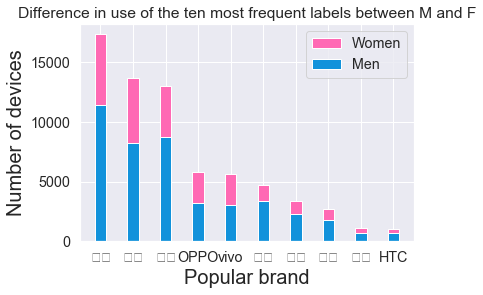

In [24]:
ind = np.arange(len(most_brand))  # the x locations for the groups
width = 0.35

p1 = plt.bar(ind,male_most_brand, width, color="#1292db")
p2 = plt.bar(ind, female_most_brand, width, color="#ff69b4"
             , bottom=male_most_brand, tick_label=list(map(str, most_brand.index)))

plt.ylabel('Number of devices',{'fontsize': 20}) 
plt.xlabel('Popular brand',{'fontsize': 20})
plt.title('Difference in use of the ten most frequent labels between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()

In [26]:
female_least_brand = []
male_least_brand = []
for brand in least_brand.index:
    app_rows = train[ train['phone_brand'] == brand]
    female_least_brand.append(len(app_rows.query('gender == "F"')))
    male_least_brand.append(len(app_rows.query('gender == "M"')))

f_users = list(female_least_brand/least_brand)
m_users = list(male_least_brand/least_brand)

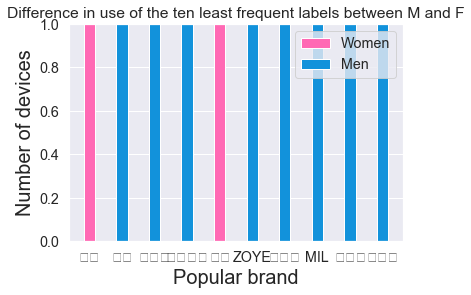

In [39]:
ind = np.arange(len(least_brand))  # the x locations for the groups
width = 0.35

p1 = plt.bar(ind,male_least_brand, width, color="#1292db")
p2 = plt.bar(ind, female_least_brand, width, color="#ff69b4"
             , bottom=male_least_brand, tick_label=list(map(str, least_brand.index)))

plt.ylabel('Number of devices',{'fontsize': 20}) 
plt.xlabel('Popular brand',{'fontsize': 20})
plt.title('Difference in use of the ten least frequent labels between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()

In [30]:
most_model = train['device_model'].value_counts().head(10)
print(most_model)
least_model = train['device_model'].value_counts(ascending=True).head(10)
print(least_model)

红米note           3016
MI 3             2304
MI 2S            2137
Galaxy Note 3    2070
MI 4             1914
Galaxy Note 2    1611
Galaxy S4        1574
荣耀6              1242
荣耀畅玩4X           1104
荣耀3C             1068
Name: device_model, dtype: int64
Galaxy S5 Plus        1
E619                  1
A7-30                 1
U960                  1
MediaPad 10 Link+?    1
BF T18 Plus           1
IdeaTab 2109A         1
K35                   1
U11                   1
One M9e               1
Name: device_model, dtype: int64


In [33]:
female_most_model = []
male_most_model= []
for brand in most_model.index:
    app_rows = train[ train['device_model'] == brand]
    female_most_model.append(len(app_rows.query('gender == "F"')))
    male_most_model.append(len(app_rows.query('gender == "M"')))

f_users = list(female_most_model/most_model)
m_users = list(male_most_model/most_model)

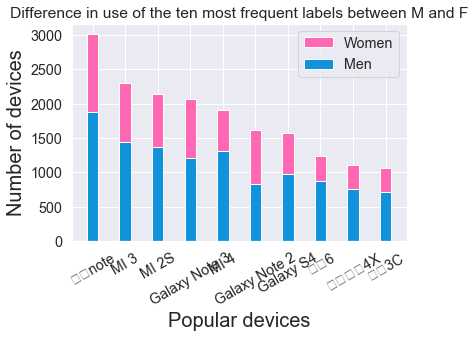

In [35]:
ind = np.arange(len(most_model))  # the x locations for the groups
width = 0.35

p1 = plt.bar(ind,male_most_model, width, color="#1292db")
p2 = plt.bar(ind, female_most_model, width, color="#ff69b4"
             , bottom=male_most_model, tick_label=list(map(str, most_model.index)))
plt.xticks(rotation=30)
plt.ylabel('Number of devices',{'fontsize': 20}) 
plt.xlabel('Popular devices',{'fontsize': 20})
plt.title('Difference in use of the ten most frequent labels between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()

In [36]:
female_least_model = []
male_least_model= []
for brand in least_model.index:
    app_rows = train[ train['device_model'] == brand]
    female_least_model.append(len(app_rows.query('gender == "F"')))
    male_least_model.append(len(app_rows.query('gender == "M"')))

f_users = list(female_least_model/least_model)
m_users = list(male_least_model/least_model)

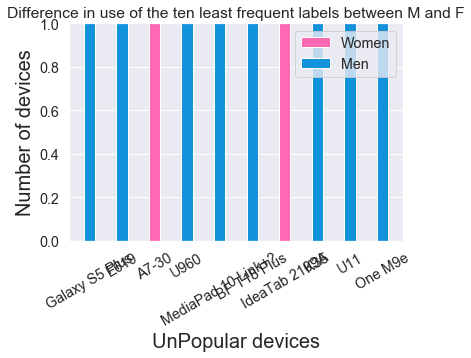

In [41]:
ind = np.arange(len(least_model))  # the x locations for the groups
width = 0.35

p1 = plt.bar(ind,male_least_model, width, color="#1292db")
p2 = plt.bar(ind, female_least_model, width, color="#ff69b4"
             , bottom=male_least_model, tick_label=list(map(str, least_model.index)))
plt.xticks(rotation=30)
plt.ylabel('Number of devices',{'fontsize': 20}) 
plt.xlabel('UnPopular devices',{'fontsize': 20})
plt.title('Difference in use of the ten least frequent labels between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()

In [41]:
labelled_app_events=labelled_app_events.merge(app_labels, how='left', on='app_id')

In [ ]:
labelled_app_events.head()

In [42]:
installed_events = labelled_app_events.query("is_installed == 1.0")
most_installed = installed_events['label_id'].value_counts().head(10)
print(most_installed)
least_installed = installed_events['label_id'].value_counts(ascending=True).head(10)
print(least_installed)


548.0     44509
1007.0    30116
704.0     27444
405.0     24798
730.0     22843
756.0     22636
777.0     20937
782.0     20766
787.0     20759
761.0     20757
Name: label_id, dtype: int64
865.0    1
193.0    1
8.0      2
731.0    2
732.0    2
790.0    2
774.0    2
104.0    2
800.0    3
29.0     3
Name: label_id, dtype: int64


In [10]:
installed_events.head()

,device_id,gender,age,group,event_id,app_id,is_installed,is_active,label_id
0,-636914245803081555,F,11,F23-,1401593.0,94347.0,1.0,0.0,710.0
1,-636914245803081555,F,11,F23-,1401593.0,94347.0,1.0,0.0,721.0
2,-636914245803081555,F,11,F23-,1401593.0,94347.0,1.0,0.0,548.0
3,-636914245803081555,F,11,F23-,1401593.0,94347.0,1.0,0.0,704.0
4,-636914245803081555,F,11,F23-,1401593.0,94347.0,1.0,0.0,232.0


In [43]:
female_most_installed = []
male_most_installed = []
for app in most_installed.index:
    app_rows = installed_events[ installed_events['label_id'] == app]
    female_most_installed.append(len(app_rows.query('gender == "F"')))
    male_most_installed.append(len(app_rows.query('gender == "M"')))

f_users = list(female_most_installed/most_installed)
m_users = list(male_most_installed/most_installed)

In [55]:
f_users = [ '%.3f' % elem for elem in f_users]
m_users = [ '%.3f' % elem for elem in m_users]

print("For the first 5 most installed categories the percentage of users are: ")
print("- females: {}\n- males: {}".format(f_users, m_users))

For the first 5 most installed categories the percentage of users are: 
- females: ['0.269', '0.270', '0.274', '0.255', '0.238', '0.230', '0.276', '0.236', '0.229', '0.273']
- males: ['0.731', '0.730', '0.726', '0.745', '0.762', '0.770', '0.724', '0.764', '0.771', '0.727']


In [29]:
x=list(map(int, most_installed.index)) 
x

[548, 704, 549, 713, 405, 730, 302, 756, 251, 303]

# BAR PLOT FOR LABELS 

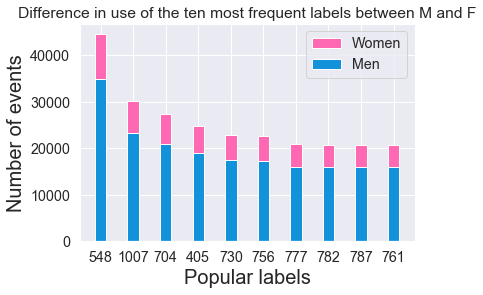

In [44]:
ind = np.arange(len(most_installed))  # the x locations for the groups
width = 0.35

p1 = plt.bar(ind, male_most_installed, width, color="#1292db")
p2 = plt.bar(ind, female_most_installed, width, color="#ff69b4"
             , bottom=male_most_installed, tick_label=list(map(int, most_installed.index)))

plt.ylabel('Number of events',{'fontsize': 20}) 
plt.xlabel('Popular labels',{'fontsize': 20})
plt.title('Difference in use of the ten most frequent labels between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()

This seems like an important variable as there is variation for male and females based on label

In [46]:
female_least_installed=[] 
male_least_installed=[] 
for app in least_installed.index: 
    app_rows=installed_events[installed_events['label_id']==app] 
    female_least_installed.append(len(app_rows.query('gender=="F"')))
    male_least_installed.append(len(app_rows.query('gender=="M"'))) 
                                  

In [47]:
f_users=list(female_least_installed/least_installed)
m_users=list(male_least_installed/least_installed) 

f_users=['%.3f' % x for x in f_users] 
m_users=['%.3f' % x for x in m_users] 

print("For the first 5 most installed categories the percentage of users are: ") 
print('male percentage {} female {}'.format(m_users,f_users))

For the first 5 most installed categories the percentage of users are: 
male percentage ['0.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '0.000'] female ['1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '1.000']


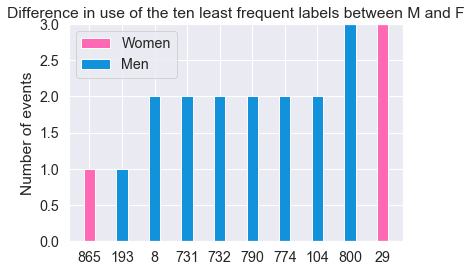

In [49]:
ind = np.arange(len(least_installed))  # the x locations for the groups
width = 0.35

plt.figure()
p1 = plt.bar(ind, male_least_installed, width, color="#1292db")
p2 = plt.bar(ind, female_least_installed, width, color="#ff69b4"
             , bottom=male_least_installed, tick_label=list(map(int, least_installed.index)))

plt.ylabel('Number of events')
plt.title('Difference in use of the ten least frequent labels between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()

Clearly these are good features as they have only male or female as users.

## Location visualisation

In [13]:
events = pd.read_csv(path.join(RAW_DATA_DIR, 'events.csv'), parse_dates=['timestamp']) 
train = pd.read_csv(path.join(RAW_DATA_DIR, 'gender_age_train.csv')) 
train_events=train.merge(events,on='device_id') 
train_events.head() 



,device_id,gender,age,group,event_id,timestamp,longitude,latitude
0,-8260683887967679142,M,35,M32-38,2479656,2016-05-01 14:23:37,0.00,0.00
1,7477216237379271436,F,37,F33-42,280934,2016-05-04 14:10:03,119.57,31.75
2,7477216237379271436,F,37,F33-42,363585,2016-05-04 14:13:30,119.57,31.75
3,7477216237379271436,F,37,F33-42,935225,2016-05-06 18:51:15,0.00,0.00
4,7477216237379271436,F,37,F33-42,1551108,2016-05-04 14:09:29,119.57,31.75


In [14]:
target_enc = LabelEncoder()
train_events['group'] = target_enc.fit_transform(train_events['group'])  




In [39]:

classes=target_enc.classes_  

c=['#4284f5','#76d130','#d1592e','#d4b331','#2ed13c','#d130c9'] 
classes=classes[:6]

# Location data for each male user wih group 

C:\Users\RISHABH\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\RISHABH\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\RISHABH\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


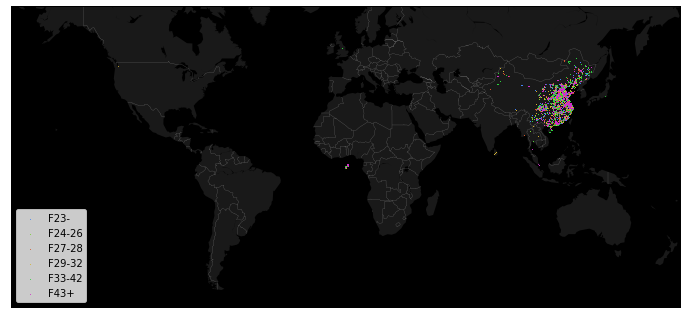

In [43]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

female_events = train_events[train_events['gender'] == 'F']
male_events = train_events[train_events['gender'] == 'M']  
plt.figure(1, figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
for i,group in enumerate(classes):
    
    gr1=female_events[female_events['group']==i] 
    x,y = m2(gr1["longitude"].tolist(), gr1["latitude"].tolist())
    m2.scatter(x,y, c=c[i],s=1, label=group,lw=0, alpha=1, zorder=5)



# Plot the data
plt.legend()
plt.show()

Different groups for female can be distinguished so it seems like a good feature.

In [45]:
classes=target_enc.classes_   
classes=classes[6:] 
classes

array(['M22-', 'M23-26', 'M27-28', 'M29-31', 'M32-38', 'M39+'],
      dtype=object)

# Location data for each female user wih group 

C:\Users\RISHABH\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\RISHABH\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\RISHABH\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


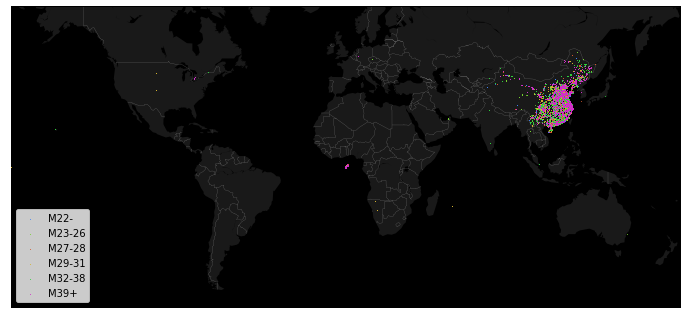

In [46]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
classes=target_enc.classes_   
classes=classes[6:]
 
plt.figure(1, figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
for i,group in enumerate(classes):
    
    gr1=male_events[male_events['group']==(i+6)] 
    x,y = m2(gr1["longitude"].tolist(), gr1["latitude"].tolist())
    m2.scatter(x,y, c=c[i],s=1, label=group,lw=0, alpha=1, zorder=5)



# Plot the data
plt.legend()
plt.show()

clearly looking we can see regions where only one type of group can be seen so it is good feature.

C:\Users\RISHABH\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\RISHABH\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\RISHABH\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


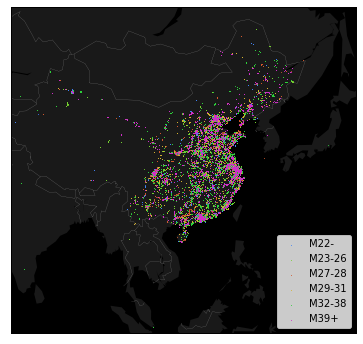

In [47]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
classes=target_enc.classes_   
classes=classes[6:]
 
plt.figure(1, figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=0,
             urcrnrlat=55,
             llcrnrlon=75,
             urcrnrlon=145,
             lat_ts=0,
             resolution='c')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
for i,group in enumerate(classes):
    
    gr1=male_events[male_events['group']==(i+6)] 
    x,y = m2(gr1["longitude"].tolist(), gr1["latitude"].tolist())
    m2.scatter(x,y, c=c[i],s=1, label=group,lw=0, alpha=1, zorder=5)



# Plot the data
plt.legend()
plt.show()

Zooming into the area we can see that regions exist of different types of groups so it is good feature

# EDA CONCLUSION

## In this EDA we found that the prediction classes are unbalanced but they are representative of the chinese population where men are more and female are less and young people who use mobile phones are more than old people so we don't need to balance these classes using up sampling and downsampling, time based features are also explored the day of the week does not seem a good feature as the data for gender is similar for men and women but we can include it and see the performance, for hour based feature we can see it is a good feature as it varies considerably for different groups ,Average number of events occuring each day is a feature we have created by feature engineering and does not seem like a good feature as the distribution is similar for men and women ,but don't know how it will perform on groups we can include it , we have created a feature median used time of day which also shows considerable variation on the group so it is a good feature, we have explored the labels feature and we can see that some labels have more men than women in them and the number of men and women vary considerably in these features so the labels is an important feature.We can create a bag of labels for each device as a feature, last we have analyzed the location feature and we have regions where only one type of groups exist so it is a good feature.